## Graduate Rotational Internship Program : SPARKS FOUNDATION

##  TASK NO :- 1.   Prediction Using Supervised ML

##### Author : KUMAR ANKIT

##### GOAL -  Predict the percentage of an student based on the no. of study hours.
#####               What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing All Necessary Libraries : 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

### Reading Dataset to Jupiter Notebook :

In [3]:
pd.read_csv('E:\Linear.csv')
print("Data imported Successfully")

Data imported Successfully


In [4]:
data = pd.read_csv('E:\Linear.csv')

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.shape

(25, 2)

In [8]:
data.size

50

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Let's plot our data points on 2-D graph to  and see if we can manually find any relationship between the data:

<Figure size 720x720 with 0 Axes>

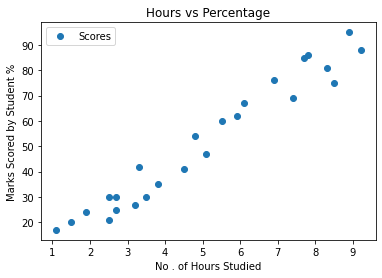

In [13]:
plt.figure(figsize = (10,10))
data.plot(x = 'Hours' , y = 'Scores' , style='o' )
plt.xlabel('No . of Hours Studied')
plt.ylabel('Marks Scored by Student %')
plt.title('Hours vs Percentage')
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Extracting our Independent Var 'X' & Dependent Var 'Y' From Our Dataset

In [14]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [15]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Importing Train Test Split From Sikit Learn Module. 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm

##### We have split our data into training and testing sets, and we will  train our algorithm.

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


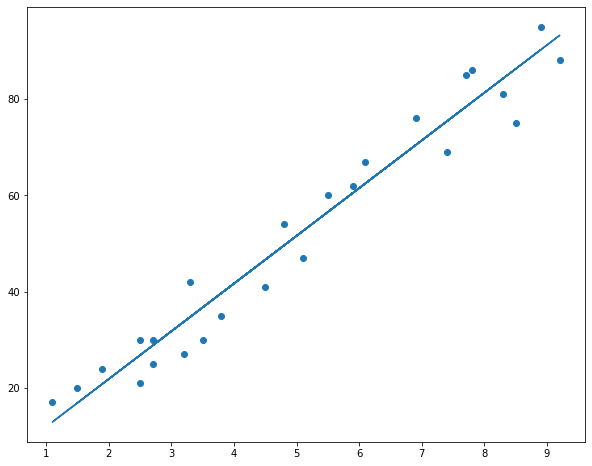

In [21]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize = (10,8))
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

##### Now that we have trained our algorithm, it's time to make some predictions.



In [22]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
